In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

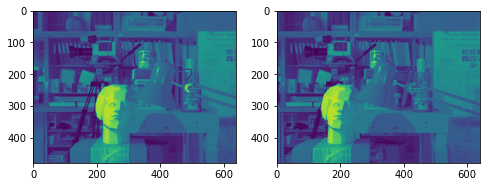

In [116]:
imgL = cv2.imread("tsukuba_daylight_L_00001.png", 0)
imgR = cv2.imread("tsukuba_daylight_R_00001.png", 0)
ground_truth = cv2.imread("tsukuba_disparity_L_00001.png")

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches((8, 4))
axs[0].imshow(imgL)
axs[1].imshow(imgR)

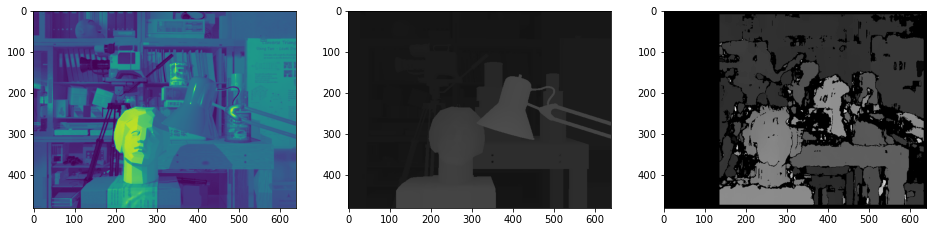

In [117]:
stereo_processor = cv2.StereoBM_create(
    numDisparities=128,
    blockSize=17,
)
disparities_BM = stereo_processor.compute(imgL, imgR)
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches((16, 4))
axs[0].imshow(imgL)
axs[1].imshow(ground_truth)
axs[2].imshow(disparities_BM, "gray")

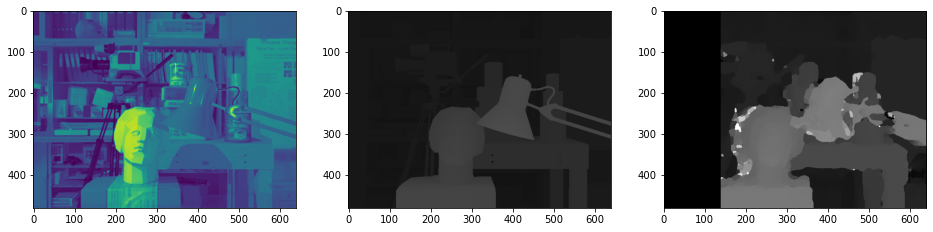

In [120]:
window_size = 10
left_matcher = cv2.StereoSGBM_create(
    minDisparity=10,
    numDisparities=128,
    blockSize=15,
    P1=8 * window_size ** 2,
    P2=32 * window_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=window_size,
    speckleRange=32
)
right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)
wls_filter = cv2.ximgproc.createDisparityWLSFilter(left_matcher)
left_disp = left_matcher.compute(imgL, imgR)
right_disp = right_matcher.compute(imgL, imgR)


disparities = stereo_processor.compute(imgL, imgR)
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches((16, 4))
axs[0].imshow(imgL)
axs[1].imshow(ground_truth)
axs[2].imshow(left_disp, "gray")
